<a href="https://colab.research.google.com/github/dalatorrem/Diplomado_Metodos_UCentral_2023/blob/main/Lectura_40_TS_APLICA_stud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<p align="center">
  <img src="https://raw.githubusercontent.com/lacamposm/Diplomado_Metodos_UCentral/main/data/images/imagen_ucentral.jpg" alt="logo_Ucentral" width="400px" height="300px">
</p>

#SARIMAX
* ARIMA (AutoRegressive Integrated Moving Average)
* SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors)

ARIMA y SARIMAX son modelos estadísticos ampliamente utilizados para predecir series temporales.

Tres componentes clave.
* (AR - p) relaciona el valor actual con valores pasados.
* (MA - q) considera que los errores de predicción son una combinación de errores pasados.
* (I - d) indica que la serie original se transforma tomando la diferencia entre valores consecutivos, posiblemente varias veces.
* (S (P-D-Q)) ARIMA para la Componente estacional.
* (X) Variables exógenas.







In [1]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

## GDP

US Quarterly GDP for the past 70 years. <br>
Producto interno bruto (Gross domestic product)

In [2]:
GDP = pd.read_csv('https://github.com/dalatorrem/Diplomado_Metodos_UCentral_2023/raw/main/data/GDP.csv', parse_dates=['DATE'])
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    290 non-null    datetime64[ns]
 1   GDP     290 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [3]:
GDP

,DATE,GDP
0,1947-01-01,2033.061
1,1947-04-01,2027.639
2,1947-07-01,2023.452
3,1947-10-01,2055.103
4,1948-01-01,2086.017
...,...,...
285,2018-04-01,18598.135
286,2018-07-01,18732.720
287,2018-10-01,18783.548
288,2019-01-01,18927.281


In [4]:
px.line(GDP, x='DATE', y='GDP')

In [5]:
GDP['DATE'].dt.year

0      1947
1      1947
2      1947
3      1947
4      1948
       ... 
285    2018
286    2018
287    2018
288    2019
289    2019
Name: DATE, Length: 290, dtype: int64

In [6]:
GDP['YEAR'] = GDP['DATE'].dt.year
GDP['MONTH'] = GDP['DATE'].dt.month
GDP

,DATE,GDP,YEAR,MONTH
0,1947-01-01,2033.061,1947,1
1,1947-04-01,2027.639,1947,4
2,1947-07-01,2023.452,1947,7
3,1947-10-01,2055.103,1947,10
4,1948-01-01,2086.017,1948,1
...,...,...,...,...
285,2018-04-01,18598.135,2018,4
286,2018-07-01,18732.720,2018,7
287,2018-10-01,18783.548,2018,10
288,2019-01-01,18927.281,2019,1


In [7]:
piv_gdp = pd.pivot_table(GDP, index='MONTH', columns='YEAR', values='GDP', aggfunc='mean')
piv_gdp

YEAR,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
MONTH,,,,,,,,,,,,,,,,,,,,,
1,2033.061,2086.017,2105.562,2184.872,2415.660,2540.550,2697.855,2649.755,2813.212,2903.671,...,15415.145,15712.754,16129.418,16382.964,16616.540,17277.580,17556.839,17925.256,18438.254,18927.281
4,2027.639,2120.450,2098.380,2251.507,2457.517,2546.022,2718.709,2652.643,2858.988,2927.665,...,15557.277,15825.096,16198.807,16403.180,16841.475,17405.669,17639.417,18021.048,18598.135,19021.860
7,2023.452,2132.598,2120.044,2338.514,2508.166,2564.401,2703.411,2682.601,2897.598,2925.035,...,15671.967,15820.700,16220.667,16531.685,17047.098,17463.222,17735.074,18163.558,18732.720,NaN
10,2055.103,2134.981,2102.251,2383.291,2513.690,2648.621,2662.482,2735.091,2914.993,2973.179,...,15750.625,16004.107,16239.138,16663.649,17143.038,17468.902,17824.231,18322.464,18783.548,NaN


In [8]:
px.imshow(piv_gdp)

## Autocorrelación

(ACF) mide la Corelación entre una serie de tiempo y sus valores pasados
<br>
 * La caida en el ACF después de unos pocos retardos inidica dependencia finita  y el retardo en el que cae  estima del valor "q".
  
* Si la ACF muestra un patrón sinusoidal o sinusoidal amortiguado, sugiere  estacionalidad.

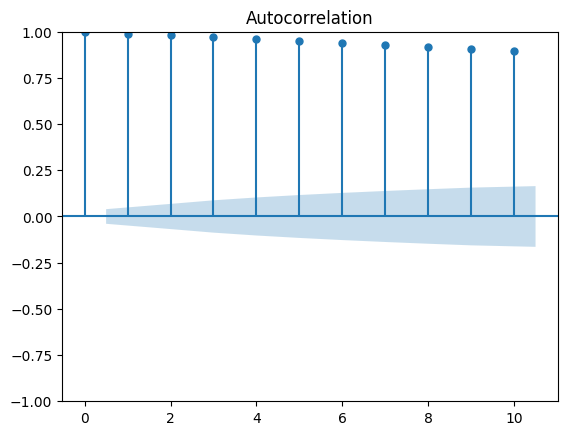

In [9]:
p = plot_acf(GDP['GDP'], lags=10, alpha=0.5)

## Autocorrelación parcial
(PACF) mide la relación entre determinado valor retrasado  y el valor actual. Se tiene en cuenta la influencia de los retardos intermedios.

* Si disminuye rápidamente después de un cierto retardo específico,  ese valor estima p.

* El corte con  la PACF proporciona una indicación del valor p.

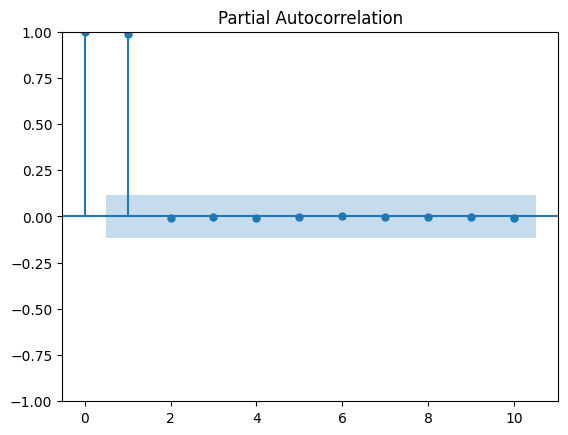

In [10]:
pacf = plot_pacf(GDP['GDP'], lags=10, alpha=0.05)

## Descomposición

In [11]:
res_decompose = seasonal_decompose(GDP[['DATE', 'GDP']].set_index('DATE'), model='additive', extrapolate_trend='freq')

<Axes: xlabel='DATE'>

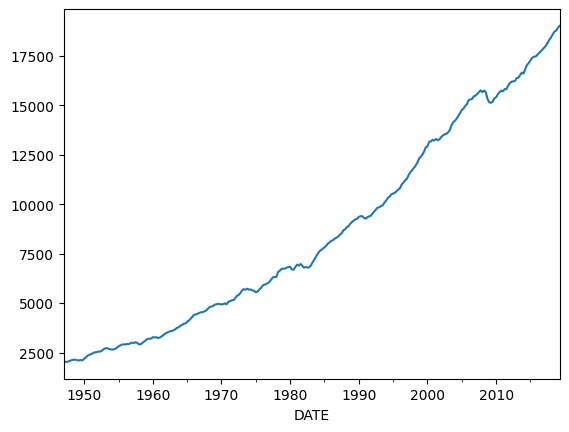

In [12]:
res_decompose.observed.plot()

<Axes: xlabel='DATE'>

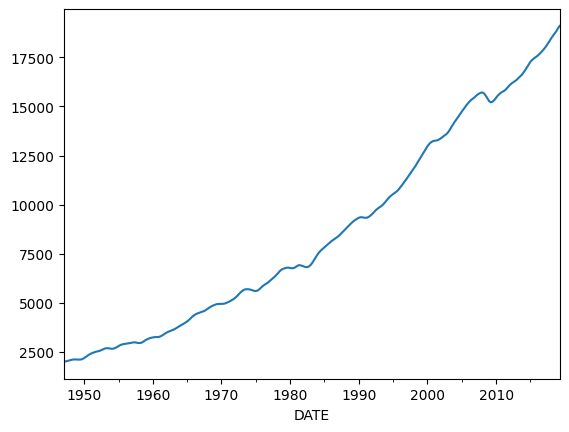

In [13]:
res_decompose.trend.plot()

<Axes: xlabel='DATE'>

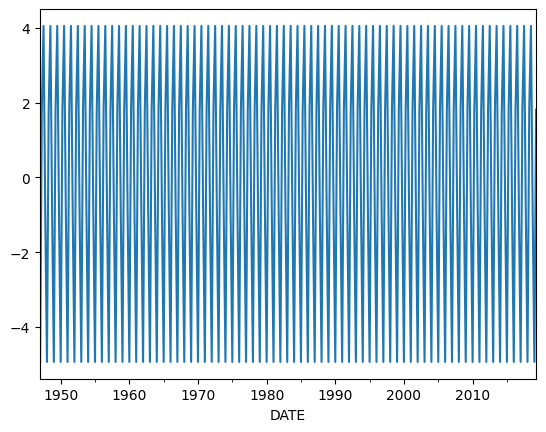

In [14]:
res_decompose.seasonal.plot()

<Axes: xlabel='DATE'>

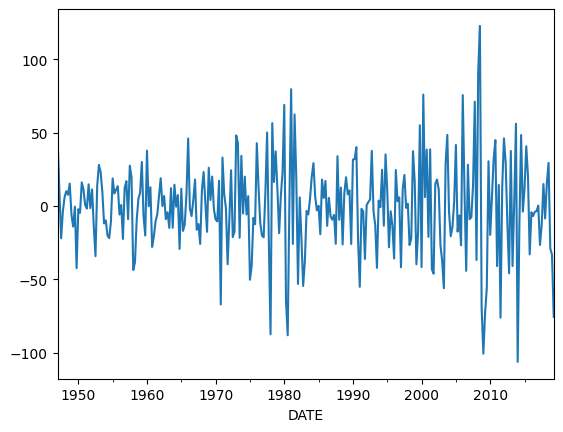

In [15]:
res_decompose.resid.plot()

Train - val -test

In [16]:
GDP

,DATE,GDP,YEAR,MONTH
0,1947-01-01,2033.061,1947,1
1,1947-04-01,2027.639,1947,4
2,1947-07-01,2023.452,1947,7
3,1947-10-01,2055.103,1947,10
4,1948-01-01,2086.017,1948,1
...,...,...,...,...
285,2018-04-01,18598.135,2018,4
286,2018-07-01,18732.720,2018,7
287,2018-10-01,18783.548,2018,10
288,2019-01-01,18927.281,2019,1


In [17]:
datos_train = GDP.iloc[:-24].copy()
datos_val  = GDP.iloc[-24:-12].copy()
datos_test  = GDP.iloc[-12:].copy()

In [18]:
px.line(datos_train, x='DATE', y='GDP')

In [19]:
px.line(datos_val, x='DATE', y='GDP')

In [20]:
px.line(datos_test, x='DATE', y='GDP')

## Modelos

In [21]:
modelo = SARIMAX(endog = datos_train[['DATE', 'GDP']].set_index('DATE'), order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
modelo_res = modelo.fit(disp=0)
modelo_res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                GDP   No. Observations:                  266
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1416.723
Date:                            Wed, 27 Sep 2023   AIC                           2843.446
Time:                                    23:17:49   BIC                           2861.113
Sample:                                01-01-1947   HQIC                          2850.554
                                     - 04-01-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7516      0.072     10.381      0.000       0.610       0.893
ma.L1         -0.4056      0.101     -4.019      0.000      -0.603      -0.208
ar.S.L12      -0.1341      0.059     -2.268      0.023      -0.250      -0.018
ma.S.L12      -0.9939      0.563     -1.765      0.078      -2.098       0.110
sigma2      3667.7422   2044.826      1.794      0.073    -340.042    7675.527
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):               156.64
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               5.28   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
pasos = len(datos_test)+len(datos_val)
modelo_res.get_forecast(steps=pasos).predicted_mean


2013-07-01    16452.005479
2013-10-01    16507.541808
2014-01-01    16575.946582
2014-04-01    16633.431706
2014-07-01    16693.770354
2014-10-01    16707.164155
2015-01-01    16732.429948
2015-04-01    16791.685624
2015-07-01    16848.291020
2015-10-01    16913.591450
2016-01-01    16965.171463
2016-04-01    17027.169000
2016-07-01    17084.186950
2016-10-01    17142.343671
2017-01-01    17196.139517
2017-04-01    17260.708464
2017-07-01    17312.164472
2017-10-01    17348.199090
2018-01-01    17386.763033
2018-04-01    17447.290853
2018-07-01    17499.172929
2018-10-01    17558.146061
2019-01-01    17622.056887
2019-04-01    17678.425148
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [23]:
len(modelo_res.get_forecast(steps=pasos).predicted_mean)

24

In [24]:
len(GDP)

290

## Comparación predicciones-reales

In [25]:
preds_val_test = modelo_res.get_forecast(steps=pasos).predicted_mean.values
preds_val_test

array([16452.00547942, 16507.54180788, 16575.94658162, 16633.4317059 ,
       16693.77035428, 16707.16415532, 16732.42994774, 16791.68562445,
       16848.29101958, 16913.59145049, 16965.17146323, 17027.16900049,
       17084.18695033, 17142.34367099, 17196.13951669, 17260.708464  ,
       17312.16447168, 17348.19908972, 17386.76303265, 17447.29085273,
       17499.17292905, 17558.14606111, 17622.05688667, 17678.42514772])

In [26]:
datos_val['PREDS_GDP'] = preds_val_test[:len(datos_val)]
datos_val

,DATE,GDP,YEAR,MONTH,PREDS_GDP
266,2013-07-01,16531.685,2013,7,16452.005479
267,2013-10-01,16663.649,2013,10,16507.541808
268,2014-01-01,16616.540,2014,1,16575.946582
269,2014-04-01,16841.475,2014,4,16633.431706
270,2014-07-01,17047.098,2014,7,16693.770354
271,2014-10-01,17143.038,2014,10,16707.164155
272,2015-01-01,17277.580,2015,1,16732.429948
273,2015-04-01,17405.669,2015,4,16791.685624
274,2015-07-01,17463.222,2015,7,16848.291020
275,2015-10-01,17468.902,2015,10,16913.591450


In [27]:
px.line(datos_val, x='DATE', y=['GDP', 'PREDS_GDP'])

## Evaluando en val

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(datos_val['GDP'], datos_val['PREDS_GDP'])

206338.89349577762

## TEST

In [30]:
datos_test['PREDS_GDP'] = preds_val_test[len(datos_val):]
datos_test

,DATE,GDP,YEAR,MONTH,PREDS_GDP
278,2016-07-01,17735.074,2016,7,17084.186950
279,2016-10-01,17824.231,2016,10,17142.343671
280,2017-01-01,17925.256,2017,1,17196.139517
281,2017-04-01,18021.048,2017,4,17260.708464
282,2017-07-01,18163.558,2017,7,17312.164472
283,2017-10-01,18322.464,2017,10,17348.199090
284,2018-01-01,18438.254,2018,1,17386.763033
285,2018-04-01,18598.135,2018,4,17447.290853
286,2018-07-01,18732.720,2018,7,17499.172929
287,2018-10-01,18783.548,2018,10,17558.146061


In [31]:
mean_squared_error(datos_test['GDP'], datos_test['PREDS_GDP'])

1052847.11456366